In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# File paths organized by features
features = ['authority', 'care', 'fairness', 'loyalty', 'sanctity']
base_paths = [
    "/content/drive/MyDrive/Lu&Marina/data/processed1/",
    "/content/drive/MyDrive/Lu&Marina/data/processed2/",
    "/content/drive/MyDrive/Lu&Marina/data/processed3/",
    "/content/drive/MyDrive/Lu&Marina/data/processed4/",
    "/content/drive/MyDrive/Lu&Marina/data/processed5/",
    "/content/drive/MyDrive/Lu&Marina/data/processed6/"
]

# Dictionary to hold dataframes for each feature
feature_dfs = {feature: [] for feature in features}

# Read and stack data for each feature
for base_path in base_paths:
    for feature in features:
        file_path = f"{base_path}{feature}_probabilities.parquet"
        try:
            df = pd.read_parquet(file_path)

            # Add a source column for identification (optional)
            df['source'] = base_path.split('/')[-2]  # Adds 'processed', 'processed2', etc.

            # Append the dataframe to the corresponding feature
            feature_dfs[feature].append(df)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Concatenate data for each feature
final_dfs = {}
for feature, dfs in feature_dfs.items():
    if dfs:  # Ensure there is data to concatenate
        final_dfs[feature] = pd.concat(dfs, ignore_index=True)

# Example: Check one of the final dataframes
for feature, df in final_dfs.items():
    print(f"Feature: {feature}")
    print(df.head())

Feature: authority
   internal_id  authority_prob      source
0            0        0.251449  processed1
1            1        0.464577  processed1
2            2        0.239684  processed1
3            3        0.745613  processed1
4            4        0.027194  processed1
Feature: care
   internal_id  care_prob      source
0            0   0.017027  processed1
1            1   0.435152  processed1
2            2   0.013824  processed1
3            3   0.715306  processed1
4            4   0.021974  processed1
Feature: fairness
   internal_id  fairness_prob      source
0            0       0.038801  processed1
1            1       0.124208  processed1
2            2       0.035192  processed1
3            3       0.105659  processed1
4            4       0.008919  processed1
Feature: loyalty
   internal_id  loyalty_prob      source
0            0      0.035312  processed1
1            1      0.469084  processed1
2            2      0.033071  processed1
3            3      0.139537  

In [4]:
from functools import reduce

# Step 1: Get list of all dataframes in the dictionary
dfs = list(final_dfs.values())

# Step 2: Merge them all on 'internal_id'
merged_df = reduce(lambda left, right: pd.merge(left, right, on=["internal_id", "source"]), dfs)

In [5]:
merged_df.head()

,internal_id,authority_prob,source,care_prob,fairness_prob,loyalty_prob,sanctity_prob
0,0,0.251449,processed1,0.017027,0.038801,0.035312,0.014074
1,1,0.464577,processed1,0.435152,0.124208,0.469084,0.081933
2,2,0.239684,processed1,0.013824,0.035192,0.033071,0.013521
3,3,0.745613,processed1,0.715306,0.105659,0.139537,0.057875
4,4,0.027194,processed1,0.021974,0.008919,0.013615,0.024569


In [6]:
merged_df.shape

(602996, 7)

In [7]:
df = pd.read_json("/content/drive/MyDrive/Lu&Marina/data/final_df_normalized_shrt.json")

In [8]:
df.head()

,internal_id,id,from,value,basic_clean_text,fully_clean_text,word_count,stopword_count,Hedges,Swearing,...,Apology,Affirmation,norm_Hedges,norm_Swearing,norm_Reassurance,norm_Please,norm_Gratitude,norm_Apology,norm_Affirmation,norm_stopword_count
0,0,QWJhYvA,human,Summarize the main ideas of Jeff Walker's Prod...,summarize the main ideas of jeff walkers produ...,summarize main idea jeff walker product launch...,29,11,0,0,...,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.3793
1,1,QWJhYvA,gpt,Here are the main ideas of Jeff Walker's Produ...,here are the main ideas of jeff walkers produc...,main idea jeff walker product launch formula c...,202,74,0,0,...,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.3663
2,2,QWJhYvA,human,Summarize the main ideas of Brendon Burchard's...,summarize the main ideas of brendon burchards ...,summarize main idea brendon burchards expert a...,28,11,0,0,...,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.3929
3,3,QWJhYvA,gpt,Here are the main ideas of Brendon Burchard's ...,here are the main ideas of brendon burchards e...,main idea brendon burchards expert academy can...,260,102,1,0,...,0,0,0.0038,0.0,0.0,0.0,0.0,0.0,0.0,0.3923
4,4,QWJhYvA,human,What are the mental triggers in Jeff Walker's ...,what are the mental triggers in jeff walkers p...,mental trigger jeff walker product launch form...,14,5,0,0,...,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.3571


In [9]:
inner_join_df = df.merge(merged_df.iloc[:, :7], on='internal_id', how='inner')

In [10]:
inner_join_df.head()

,internal_id,id,from,value,basic_clean_text,fully_clean_text,word_count,stopword_count,Hedges,Swearing,...,norm_Gratitude,norm_Apology,norm_Affirmation,norm_stopword_count,authority_prob,source,care_prob,fairness_prob,loyalty_prob,sanctity_prob
0,0,QWJhYvA,human,Summarize the main ideas of Jeff Walker's Prod...,summarize the main ideas of jeff walkers produ...,summarize main idea jeff walker product launch...,29,11,0,0,...,0.0,0.0,0.0,0.3793,0.251449,processed1,0.017027,0.038801,0.035312,0.014074
1,1,QWJhYvA,gpt,Here are the main ideas of Jeff Walker's Produ...,here are the main ideas of jeff walkers produc...,main idea jeff walker product launch formula c...,202,74,0,0,...,0.0,0.0,0.0,0.3663,0.464577,processed1,0.435152,0.124208,0.469084,0.081933
2,2,QWJhYvA,human,Summarize the main ideas of Brendon Burchard's...,summarize the main ideas of brendon burchards ...,summarize main idea brendon burchards expert a...,28,11,0,0,...,0.0,0.0,0.0,0.3929,0.239684,processed1,0.013824,0.035192,0.033071,0.013521
3,3,QWJhYvA,gpt,Here are the main ideas of Brendon Burchard's ...,here are the main ideas of brendon burchards e...,main idea brendon burchards expert academy can...,260,102,1,0,...,0.0,0.0,0.0,0.3923,0.745613,processed1,0.715306,0.105659,0.139537,0.057875
4,4,QWJhYvA,human,What are the mental triggers in Jeff Walker's ...,what are the mental triggers in jeff walkers p...,mental trigger jeff walker product launch form...,14,5,0,0,...,0.0,0.0,0.0,0.3571,0.027194,processed1,0.021974,0.008919,0.013615,0.024569


In [11]:
descriptive_stats = inner_join_df[inner_join_df['from'] == 'human'][['authority_prob', 'care_prob', 'fairness_prob', 'loyalty_prob', 'sanctity_prob']].describe(
    percentiles=[0.25, 0.5, 0.75]
)

# Selecting summary statistics: mean, standard deviation, and percentiles (25%, 50%, 75%)
descriptive_summary = descriptive_stats.loc[['mean', 'std', '25%', '50%', '75%']]
descriptive_summary.round(4)

,authority_prob,care_prob,fairness_prob,loyalty_prob,sanctity_prob
mean,0.1080,0.0717,0.0902,0.0372,0.0295
std,0.1670,0.1684,0.1331,0.0815,0.0720
25%,0.0204,0.0127,0.0202,0.0109,0.0116
50%,0.0421,0.0178,0.0424,0.0175,0.0157
75%,0.1066,0.0338,0.0980,0.0311,0.0238


In [12]:
descriptive_stats = inner_join_df[inner_join_df['from'] == 'gpt'][['authority_prob', 'care_prob', 'fairness_prob', 'loyalty_prob', 'sanctity_prob']].describe(
    percentiles=[0.25, 0.5, 0.75]
)

# Selecting summary statistics: mean, standard deviation, and percentiles (25%, 50%, 75%)
descriptive_summary = descriptive_stats.loc[['mean', 'std', '25%', '50%', '75%']]
descriptive_summary.round(4)

,authority_prob,care_prob,fairness_prob,loyalty_prob,sanctity_prob
mean,0.2550,0.2686,0.1631,0.1069,0.0593
std,0.2420,0.3202,0.1831,0.1709,0.1264
25%,0.0746,0.0261,0.0507,0.0212,0.0138
50%,0.1518,0.0839,0.0970,0.0375,0.0210
75%,0.3725,0.4774,0.1914,0.0968,0.0426


In [13]:
from scipy.stats import shapiro, mannwhitneyu

# Splitting the dataset by 'from' column
human_df = inner_join_df[inner_join_df['from'] == 'human']
gpt_df = inner_join_df[inner_join_df['from'] == 'gpt']

# Columns to test
columns_to_test = ['authority_prob', 'care_prob', 'fairness_prob', 'loyalty_prob', 'sanctity_prob']

# Function to check normality and perform Mann-Whitney U test
results = []

for col in columns_to_test:
    # Shapiro-Wilk test for normality
    human_normality = shapiro(human_df[col])
    gpt_normality = shapiro(gpt_df[col])

    # Mann-Whitney U test
    mann_whitney = mannwhitneyu(human_df[col], gpt_df[col], alternative='two-sided')

    # Collecting results
    results.append({
        'Feature': col,
        'Human Normality p-value': human_normality.pvalue,
        'GPT Normality p-value': gpt_normality.pvalue,
        'Mann-Whitney U Statistic': mann_whitney.statistic,
        'Mann-Whitney p-value': mann_whitney.pvalue
    })

# Creating a DataFrame to summarize results
test_results_df = pd.DataFrame(results)
test_results_df

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 301498.
  res = hypotest_fun_out(*samples, **kwds)


,Feature,Human Normality p-value,GPT Normality p-value,Mann-Whitney U Statistic,Mann-Whitney p-value
0,authority_prob,1.791260e-180,3.864579e-152,2.085577e+10,0.0
1,care_prob,2.073750e-195,2.884740e-162,1.918284e+10,0.0
2,fairness_prob,3.160468e-181,6.362998e-168,2.757531e+10,0.0
3,loyalty_prob,4.699173e-199,3.394282e-182,2.349651e+10,0.0
4,sanctity_prob,1.474963e-204,1.875553e-195,3.358454e+10,0.0


In [14]:
pd.reset_option('display.max_columns')

In [15]:
print(inner_join_df.columns.tolist())

['internal_id', 'id', 'from', 'value', 'basic_clean_text', 'fully_clean_text', 'word_count', 'stopword_count', 'Hedges', 'Swearing', 'Reassurance', 'Please', 'Gratitude', 'Apology', 'Affirmation', 'norm_Hedges', 'norm_Swearing', 'norm_Reassurance', 'norm_Please', 'norm_Gratitude', 'norm_Apology', 'norm_Affirmation', 'norm_stopword_count', 'authority_prob', 'source', 'care_prob', 'fairness_prob', 'loyalty_prob', 'sanctity_prob']


In [16]:
# Mapping column names to more descriptive names
rename_columns = {
    "norm_Hedges": "Hedges",
    # "norm_Swearing": "Swearing",
    # "norm_Reassurance": "Reassurance",
    "norm_Please": "Please",
    "norm_Gratitude": "Gratitude",
    "norm_Apology": "Apology",
    "norm_Affirmation": "Affirmation",
    "authority_prob": "Authority",
    "care_prob": "Care",
    "fairness_prob": "Fairness",
    "loyalty_prob": "Loyalty",
    "sanctity_prob": "Sanctity"
}

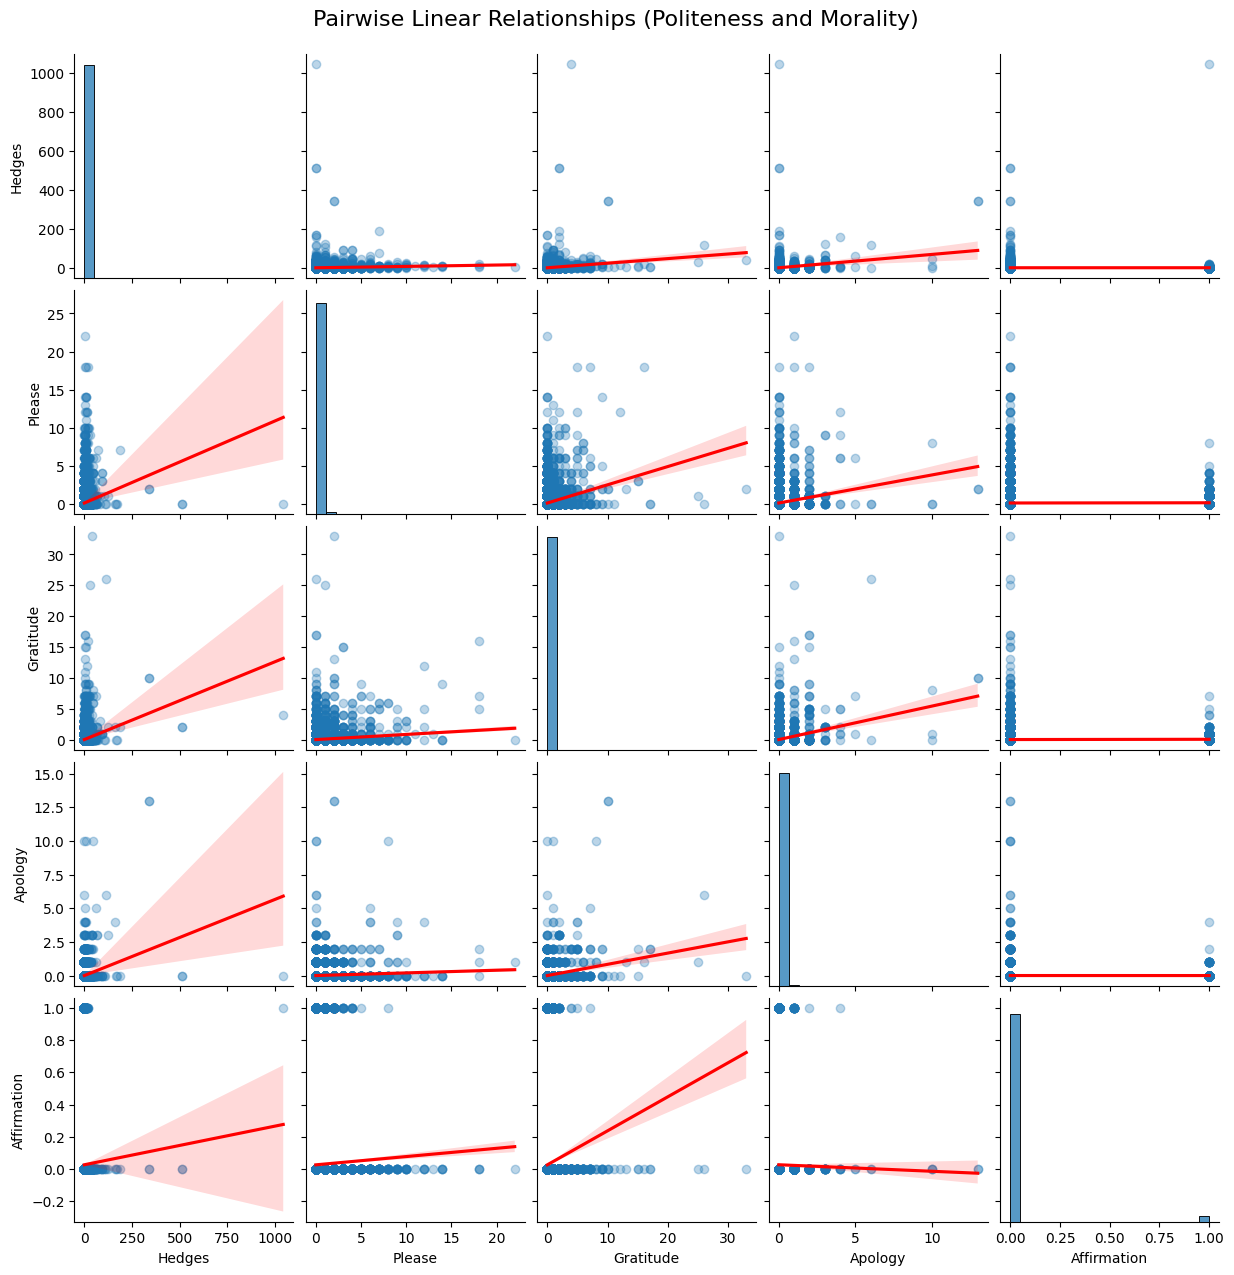

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you’re only working with the features of interest
selected_columns = list(dict.fromkeys(rename_columns.values()))
selected_columns = [col for col in selected_columns if col in human_df.columns]
human_df = human_df.loc[:, ~human_df.columns.duplicated()]
data = human_df[selected_columns]

# Pairplot with regression lines to assess linearity
sns.pairplot(data, kind="reg", plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.3}})
plt.suptitle("Pairwise Linear Relationships (Politeness and Morality)", y=1.02, fontsize=16)
plt.show()

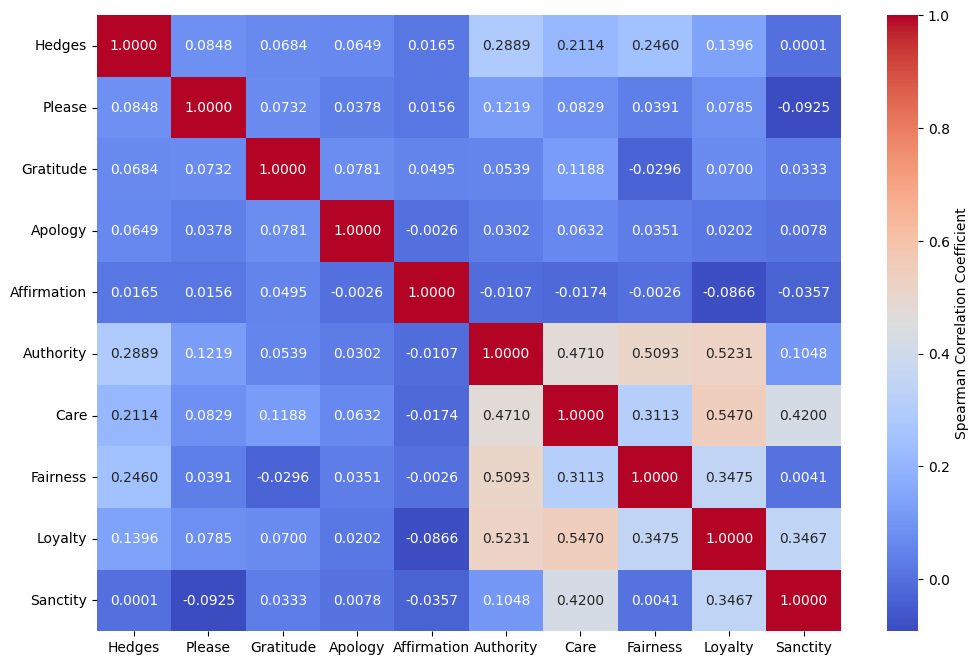

In [19]:
# Rename columns for better readability
human_df.rename(columns=rename_columns, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Select only the mapped columns that exist
selected_columns = list(dict.fromkeys(rename_columns.values()))
selected_columns = [col for col in selected_columns if col in human_df.columns]
human_df = human_df.loc[:, ~human_df.columns.duplicated()]

# Calculate Spearman correlation matrix
correlation_matrix = human_df[selected_columns].corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    cbar_kws={'label': 'Spearman Correlation Coefficient'}
)
# plt.title("Spearman Correlation Heatmap: Politeness and Morality Features", fontsize=14)
plt.show()

<ipython-input-20-a40b3fdc2bec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_df.rename(columns=rename_columns, inplace=True)


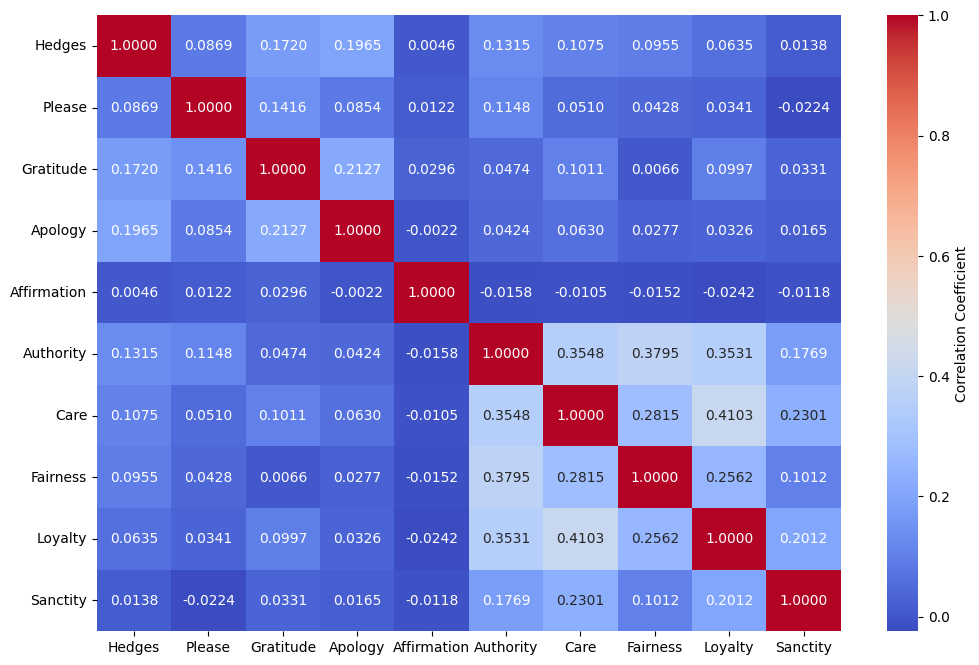

In [ ]:
# Mapping column names to more descriptive names
rename_columns = {
    "norm_Hedges": "Hedges",
    # "norm_Swearing": "Swearing",
    # "norm_Reassurance": "Reassurance",
    "norm_Please": "Please",
    "norm_Gratitude": "Gratitude",
    "norm_Apology": "Apology",
    "norm_Affirmation": "Affirmation",
    "authority_prob": "Authority",
    "care_prob": "Care",
    "fairness_prob": "Fairness",
    "loyalty_prob": "Loyalty",
    "sanctity_prob": "Sanctity"
}

gpt_df.rename(columns=rename_columns, inplace=True)

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = list(dict.fromkeys(rename_columns.values()))

# Step 2: Keep only the columns that exist in the DataFrame
selected_columns = [col for col in selected_columns if col in gpt_df.columns]
gpt_df = gpt_df.loc[:, ~gpt_df.columns.duplicated()]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    cbar_kws={'label': 'Correlation Coefficient'}
)
# plt.title("Correlation Heatmap: Politeness and Morality Features", fontsize=14)
plt.show()